# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [2]:
# Load the data
raw_data = pd.read_csv('Categorical.csv')
# Check the data
raw_data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


Remove the duplicate index column from the dataset. 

In [3]:
data = raw_data.copy()

## Map the data

Use the <i>'continent'</i> category for this analysis.

Models for arranging continents:

|Index|Four continents|Five continents|Six continents(A)|Six continents(B)|Seven continents|
|:-:|:-:|:-:|:-:|:-:|:-:|
|0|Afro-Eurasia|Africa|Africa|Africa|Africa|
|1|America|Eurasia|Asia|Eurasia|Asia
|2|Antarctica|America|Europe|North America|Europe
|3|Australia|Antarctica|America|South America|North America
|4||Australia|Antarctica|Antarctica|South America
|5|||Australia/Oceania|Australia/Oceania|Antarctica
|6|||||Australia/Oceania

In [16]:
#Encode continent column values as numbers
# Using 7 Continent Model
data_mapped=data.copy()
data_mapped['continent']=data_mapped['continent'].map({'Africa':0,'Asia':1,'Europe':2,'North America':3,'South America':4,'Antarctica':5,'Oceania':6,'Seven seas (open ocean)':7})
data_mapped.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,3
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,3
4,Albania,20.049834,41.142450,2


## Select the features

In [31]:
x=data_mapped.iloc[:,1:4]
x.head()

,Longitude,Latitude,continent
0,-69.982677,12.520880,3
1,66.004734,33.835231,1
2,17.537368,-12.293361,0
3,-63.064989,18.223959,3
4,20.049834,41.142450,2


## Clustering

Use 4 clusters initially.

In [30]:
kmeans=KMeans(8)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [27]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([2, 6, 3, 2, 0, 0, 0, 6, 2, 6, 4, 3, 1, 3, 2, 1, 0, 6, 3, 0, 5, 5,
       6, 0, 6, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 6, 3, 5, 0, 2, 1, 5, 5,
       3, 5, 4, 2, 3, 5, 2, 2, 2, 2, 6, 6, 0, 0, 6, 2, 0, 2, 5, 2, 6, 6,
       0, 0, 3, 0, 1, 2, 0, 0, 1, 5, 0, 6, 0, 5, 5, 5, 5, 5, 0, 2, 0, 2,
       1, 2, 1, 3, 2, 0, 2, 0, 1, 0, 6, 1, 3, 0, 6, 6, 0, 6, 0, 2, 0, 6,
       1, 6, 6, 3, 6, 1, 2, 2, 1, 0, 6, 1, 6, 5, 0, 2, 0, 6, 3, 0, 0, 0,
       1, 2, 5, 0, 0, 3, 6, 2, 1, 0, 5, 0, 1, 0, 1, 1, 3, 5, 2, 3, 3, 1,
       3, 1, 5, 1, 5, 2, 4, 0, 0, 6, 1, 1, 6, 6, 2, 4, 2, 1, 1, 1, 0, 2,
       1, 0, 2, 6, 4, 6, 0, 6, 3, 5, 6, 6, 3, 5, 1, 2, 5, 1, 5, 2, 0, 6,
       3, 2, 0, 5, 2, 0, 0, 0, 3, 2, 3, 6, 2, 5, 5, 1, 6, 6, 1, 4, 2, 0,
       6, 1, 3, 3, 0, 2, 2, 6, 0, 2, 2, 2, 2, 1, 1, 4, 4, 6, 3, 3, 3])

In [28]:
#create dataframe to see things clearly
data_with_clusters=data.copy()
data_with_clusters['Cluster']=identified_clusters
data_with_clusters.head()

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,North America,2
1,Afghanistan,66.004734,33.835231,Asia,6
2,Angola,17.537368,-12.293361,Africa,3
3,Anguilla,-63.064989,18.223959,North America,2
4,Albania,20.049834,41.142450,Europe,0


## Plot the data

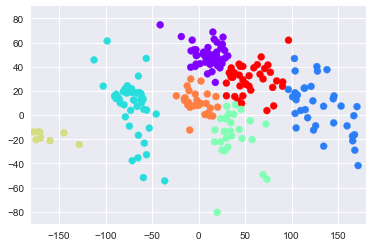

In [29]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.